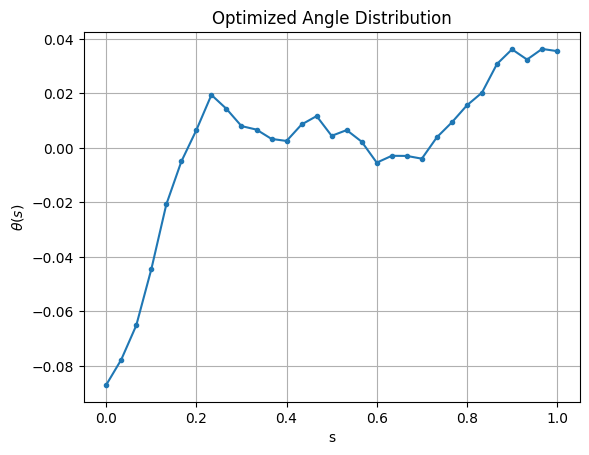

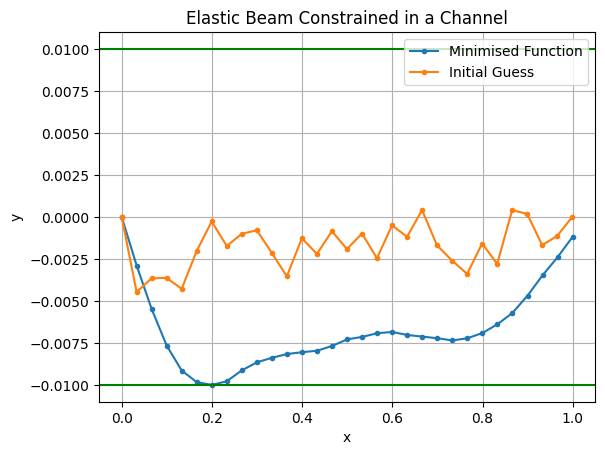

Energy of Minimised Function: 8.06205


In [131]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import basinhopping
from scipy.ndimage import uniform_filter1d

def generate_theta_from_y(s, c):
    n = len(s)
    ds = s[1] - s[0]

    y = -c + 2 * c * np.random.rand(n-2)
    y_smooth = np.concatenate(([0], uniform_filter1d(y, size=5), [0]))

    dyds = np.diff(y_smooth) / ds
    dyds = np.clip(dyds, -0.999, 0.999)

    theta = np.zeros(n)
    theta[:-1] = np.arcsin(dyds)

    return theta

penalty_coeff1 = 1e2
penalty_coeff2 = 1e5
n = 30  # number of segments
p = 250  # dimensionless force
c = 0.01  # distance beween channel edge and zero line

# arrays
# theta0 = c/0.35*np.linspace(-1, 1, n+1)
s, h = np.linspace(0, 1, n+1, retstep=True)
# k = np.pi / 1
# theta0 = 0.02 * (np.cos(k*s) + 2 * np.cos(3*k*s))
theta0 = generate_theta_from_y(s, c)

# Energy functional
def energy_functional(theta, p, h, c, penalty_coeff1, penalty_coeff2):
    n = len(theta) - 1
    diffs = np.diff(theta)  # theta[i+1] - theta[i], length n
    v = 0.5 * np.sum(diffs**2) + p / (n+1)**2 * np.sum(np.cos(theta))
    
    dy = h * np.sin(theta[:n+1])  # increments in y direction for each segment

    y = np.concatenate(([0], np.cumulative_sum(dy)))

    penalty = penalty_coeff1*np.sum(np.maximum(0, y**2 - c**2)) + penalty_coeff2*y[-1]**2

    return v + penalty

# Minimize energy
res = basinhopping(func=energy_functional, niter=20, T=0.05, x0=theta0, minimizer_kwargs={"method": "BFGS", "args": (p, h, c, penalty_coeff1, penalty_coeff2)})

# Extract optimized theta
res_theta = res.x

# Plot theta(s)
marker = 'none'
if n <= 30:
    marker = '.'
plt.figure()
if n <= 30:
    plt.plot(s, res_theta, marker=marker)
else:
    plt.plot(s, res_theta)
plt.xlabel("s")
plt.ylabel(r"$\theta(s)$")
plt.title("Optimized Angle Distribution")
plt.grid(True)
plt.show()

# Reconstruct curve (x, y) - minimised
x = [0]
y = [0]
for i in range(n):  # FIXED: was n+1
    x.append(x[-1] + h * np.cos(res_theta[i]))
    y.append(y[-1] + h * np.sin(res_theta[i]))
x = np.array(x)
y = np.array(y)


# Plot shape
plt.figure()
plt.plot(x, y, marker=marker, label = "Minimised Function")
plt.axhline(y=c, color='g')
plt.axhline(y=-c, color='g')

# Reconstruct curve (x, y) - initial guess
x = [0]
y = [0]
for i in range(n): 
    x.append(x[-1] + h * np.cos(theta0[i]))
    y.append(y[-1] + h * np.sin(theta0[i]))
x = np.array(x)
y = np.array(y)

# Plot shape
plt.plot(x, y, marker=marker, label = "Initial Guess")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.title("Elastic Beam Constrained in a Channel")
plt.show()

print("Energy of Minimised Function:", round(res.fun,5))

In [118]:
t1 = theta0
t1

array([-0.07822725, -0.0581099 ,  0.08713846, -0.0037317 , -0.05836115,
       -0.03398107,  0.03302006, -0.0259369 ,  0.04945659,  0.03196417,
        0.00722591,  0.0621473 , -0.03482786, -0.04221335,  0.05364928,
        0.09332862, -0.05296848,  0.04006365,  0.06179107, -0.04921611,
        0.01183862,  0.0675041 ,  0.01405485, -0.06109013, -0.00187617,
       -0.07293324, -0.09294934, -0.08397047,  0.0114168 ,  0.12601793,
        0.        ])